### 字符/单个字格的特征 char_fea

### line特征 line_fea
- 位置特征  起始位置（第一个字符的位置） 终止位置（最后一个字符的位置）  该行在整个block的位置
文字特征


In [47]:
# {'x0': Decimal('56.640'), 'y0': Decimal('786.914'), 'x1': Decimal('65.640'), 'y1': Decimal('795.941')}
# {'x0': Decimal('65.640'), 'y0': Decimal('786.914'), 'x1': Decimal('74.640'), 'y1': Decimal('795.941'), }

# <center>plumber</center>

In [2]:
# pdf =  pdfplumber.open("./pdfs/pdf_catas/年度报告多页.pdf")
import pdfplumber
import re
# file_name = "深圳广田集团股份有限公司 2018 年年度报告摘要.PDF"
# file_name = "天科股份2017年年度报告摘要.pdf"
# file_name = "20190713_国泰君安_宏观周报_ 信用流向地产和基建，制造业内外交困_花长春 韩旭 董琦 赵格格.pdf"
# file_name = "年度报告多页.pdf"
# file_name = "大连万达商业地产股份有限公司2016年公司债券（第一期）募集说明书.pdf"
# file_name = "电子元器件行业：数据显示行业见底，关注供需变化情况－2019年11月-华金证券191201.pdf"
file_name = "天龙集团：2018年第三季度报告全文 7.pdf"
# file_name = "碧水源(300070)我们真正缺少的是干净水,新水源开发破解缺水难题.pdf"
# file_name = "页面提取自－中行.pdf"
# pdf =  pdfplumber.open("./pdfs/pdf_catas/比音勒芬.PDF")

pdf =  pdfplumber.open("./pdfs/%s" % file_name)

In [3]:
page = pdf.pages[0]

In [4]:
# import copy

In [5]:
# n_page = copy.deepcopy(page)
{'fontname': 'LNUHNF+SimSun', 'adv': Decimal('180.000'), 'upright': 1, 'x0': Decimal('526.919'), 'y0': Decimal('786.914'), 'x1': Decimal('535.919'), 'y1': Decimal('795.941'), 'width': Decimal('9.000'), 'height': Decimal('9.027'), 'size': Decimal('9.027'), 'object_type': 'char', 'page_number': 1, 'text': '文', 'top': Decimal('45.959'), 'bottom': Decimal('54.986'), 'doctop': Decimal('45.959')}
{'fontname': 'AUWCNV+TimesNewRomanPSMT', 'adv': Decimal('90.000'), 'upright': 1, 'x0': Decimal('295.440'), 'y0': Decimal('50.816'), 'x1': Decimal('299.940'), 'y1': Decimal('62.921'), 'width': Decimal('4.500'), 'height': Decimal('12.105'), 'size': Decimal('12.105'), 'object_type': 'char', 'page_number': 1, 'text': '6', 'top': Decimal('778.979'), 'bottom': Decimal('791.084'), 'doctop': Decimal('778.979')}
{'fontname': 'LNUHNF+SimSun', 'adv': Decimal('319.000'), 'upright': 1, 'x0': Decimal('237.480'), 'y0': Decimal('728.073'), 'x1': Decimal('253.430'), 'y1': Decimal('744.071'), 'width': Decimal('15.950'), 'height': Decimal('15.998'), 'size': Decimal('15.998'), 'object_type': 'char', 'page_number': 1, 'text': '第', 'top': Decimal('97.829'), 'bottom': Decimal('113.827'), 'doctop': Decimal('97.829')}

In [6]:
# page.extract_text().split("\n")
for i in range(len(page.chars)-1):
    print(page.chars[i])

{'fontname': 'LNUHNF+SimSun', 'adv': Decimal('180.000'), 'upright': 1, 'x0': Decimal('56.640'), 'y0': Decimal('786.914'), 'x1': Decimal('65.640'), 'y1': Decimal('795.941'), 'width': Decimal('9.000'), 'height': Decimal('9.027'), 'size': Decimal('9.027'), 'object_type': 'char', 'page_number': 1, 'text': '广', 'top': Decimal('45.959'), 'bottom': Decimal('54.986'), 'doctop': Decimal('45.959')}
{'fontname': 'LNUHNF+SimSun', 'adv': Decimal('180.000'), 'upright': 1, 'x0': Decimal('65.640'), 'y0': Decimal('786.914'), 'x1': Decimal('74.640'), 'y1': Decimal('795.941'), 'width': Decimal('9.000'), 'height': Decimal('9.027'), 'size': Decimal('9.027'), 'object_type': 'char', 'page_number': 1, 'text': '东', 'top': Decimal('45.959'), 'bottom': Decimal('54.986'), 'doctop': Decimal('45.959')}
{'fontname': 'LNUHNF+SimSun', 'adv': Decimal('180.000'), 'upright': 1, 'x0': Decimal('74.640'), 'y0': Decimal('786.914'), 'x1': Decimal('83.640'), 'y1': Decimal('795.941'), 'width': Decimal('9.000'), 'height': Decima

In [4]:
# page.rects

In [5]:
# page.curves

In [6]:
def split_line(c0,c1):
    """
    c0: 当前char
    c1: 下一个char
    """
    if c0["y0"] > c1["y1"] or c0["y1"] < c1["y0"]:
        return True

def new_row():
    cur_row = {}
    cur_row["texts"] = []
    cur_row["xs0"] = []
    cur_row["xs1"] = []
    return cur_row

def appends(char,cur_row):
    """
    char: page.chars[i]
    """
    cur_row["texts"].append(char["text"])
    cur_row["xs0"].append(char["x0"])
    cur_row["xs1"].append(char["x1"])
    return cur_row

def no_empty(item):
    return "".join(item["texts"]).strip() != ""

def chars2lines(page):
    """
    """
    rows = []
    cur_row = new_row()
    # cur_max_height = 0
    for i in range(len(page.chars)-1):
        cur_row = appends(page.chars[i], cur_row)
        # cur_max_height = max(round(page.chars[i]["y0"]),cur_max_height)
        if split_line(page.chars[i],page.chars[i+1]):
            rows.append(cur_row)
            cur_row = new_row()
    cur_row = appends(page.chars[-1], cur_row)
    rows.append(cur_row) 
    rows = list(filter(no_empty,rows))
    return rows

rows = chars2lines(page)
for row in rows:
    print("".join(row["texts"]))

中国银行股份有限公司 
2017年12月31日合并及母公司资产负债表 
(除特别注明外，金额单位均为百万元人民币) 
114 
  中国银行集团  中国银行 
 注释 
2017年 
12月31日  
2016年 
12月31日  
2017年 
12月31日  
2016年 
12月31日 
资产         
现金及存放中央银行款项 七、1 2,303,020  2,349,188  2,191,571  2,253,714 
存放同业款项 七、2 485,057  582,434  451,527  591,011 
贵金属  172,763  161,417  166,687  156,155 
拆出资金 七、3 486,559  483,929  512,608  461,200 
以公允价值计量且其变动计入
当期损益的金融资产 七、4 193,611  124,090  109,022  59,144 
衍生金融资产 七、5 94,912  130,549  72,055  85,604 
买入返售金融资产 七、6 88,840  110,119  73,030  92,351 
应收利息 七、7 96,919  79,836  87,245  72,457 
发放贷款和垫款 七、8 10,644,304  9,735,646  9,443,898  8,683,440 
可供出售金融资产 七、9 1,857,222  1,609,830  1,193,010  1,026,700 
持有至到期投资 七、10 2,089,864  1,843,043  2,028,333  1,773,569 
应收款项类投资 七、11 414,025  395,921  402,951  378,426 
长期股权投资 七、12 17,180  14,059  246,630  189,960 
投资性房地产 七、13 21,026  21,659  2,025  2,144 
固定资产 七、14 205,614  194,897  83,439  84,962 
无形资产 七、15 18,835  14,542  17,387  13,068 
商誉 七、16 2,481  2,473  -  - 
递延所得税资产 七、30 46,487  34,341  47

In [7]:
def lines2paras():
    pass

In [36]:
# # 没有空格，不分段，空格在行尾，不分段，有空格不一定分段，看是否在同一行
# cs = ""
# for c in page.chars:
#     cs += c["text"]
# # cs = re.sub(r'[ ]{2,20000}', '  ', cs)
# cs.split("\n")

In [11]:
# for page in pdf.pages:
# {'fontname': 'Times New Roman', 'adv': Decimal('2.250'), 'upright': 1, 'x0': Decimal('297.650'), 'y0': Decimal('803.496'), 'x1': Decimal('299.900'), 'y1': Decimal('811.677'), 'width': Decimal('2.250'), 'height': Decimal('8.181'), 'size': Decimal('8.181'), 'object_type': 'char', 'page_number': 1, 'text': ' ', 'top': Decimal('30.243'), 'bottom': Decimal('38.424'), 'doctop': Decimal('30.243')}

# {'fontname': 'ABCDEE+楷体_GB2312', 'adv': Decimal('15.960'), 'upright': 1, 'x0': Decimal('85.824'), 'y0': Decimal('719.170'), 'x1': Decimal('101.784'), 'y1': Decimal('735.130'), 'width': Decimal('15.960'), 'height': Decimal('15.960'), 'size': Decimal('15.960'), 'object_type': 'char', 'page_number': 1, 'text': '信', 'top': Decimal('106.790'), 'bottom': Decimal('122.750'), 'doctop': Decimal('106.790')}

# xs0 = []
# xs1 = []
# for c in page.chars:
#     print(c)
#     xs0.append(c["x0"])
#     xs1.append(c["x1"])
# print((min(xs0)+max(xs1))/2)
    # if not is_has_sth(c["text"]) and not is_has_sth(c["text"],u'[0-9]'):
    # print("-"+c["text"]+"-",round(c["x0"]),round(c["y0"]),round(c["x1"]),round(c["y1"]),abs(round(c["y0"]-c["y1"])))

In [57]:
round(page.bbox[2])

595

In [4]:
page.bbox[2]

Decimal('595.320')

In [58]:
min(1,2)

1

In [67]:
def no_empty(item):
    return item["text"].strip() != ""

def char2edge(page):
    """
    pdfplumber解析出来的char_blocks,先页眉后页脚，再正文
    如果y增加，则换行
    """
    chars = list(filter(no_empty,page.chars))
    edges = []
    for i in range(len(chars)-1):
        cur_c = chars[i]
        if cur_c["text"] != "":
            next_c = chars[i+1]
            vec = (round(next_c["x0"]) - round(cur_c["x1"]), round(next_c["y1"]) - round(cur_c["y1"]))
            fs_diff = 1- float(min(next_c["height"], cur_c["height"])/max(next_c["height"], cur_c["height"]))
            edges.append([vec,fs_diff,cur_c["text"],next_c["text"]])
    return edges

edges = char2edge(page)
for edge in edges:
    if abs(edge[0][0]) >10 and abs(edge[0][1]) >10 and edge[1] != 0.0:
        print(edge,"-----")
    # else:
    #     print(edge)

[(-221, 724), 0.10699999999999998, '分', '['] -----
[(-25, -26), 0.3285714285714286, '3', '信'] -----
[(-233, -32), 0.2003759398496241, '困', '—'] -----
[(-337, -28), 0.31631054131054126, '报', '['] -----
[(14, 13), 0.062402333576414226, ']', '花'] -----
[(-296, -15), 0.1449545850441707, ')', '0'] -----
[(-331, -12), 0.145273631840796, 'm', '证'] -----
[(-313, -18), 0.23644444444444446, '9', '本'] -----
[(-258, -11), 0.25, '。', '摘'] -----
[(-30, -19), 0.20008333333333328, '：', '['] -----
[(-282, -20), 0.1070075757575758, '：', '1'] -----
[(-73, -20), 0.1070075757575758, '。', '2'] -----
[(-231, -20), 0.1070075757575758, '。', '3'] -----
[(-310, -16), 0.09100378787878793, '的', 'P'] -----
[(-227, -23), 0.4339962121212121, '。', '\uf06c'] -----
[(-278, -22), 0.4339962121212121, '值', '\uf06c'] -----
[(-273, -23), 0.4339962121212121, '现', '\uf06c'] -----
[(-331, -23), 0.4339962121212121, '。', '\uf06c'] -----
[(-273, -23), 0.4339962121212121, '。', '\uf06c'] -----
[(-63, -19), 0.1477272727272727, '队', '

In [6]:
def split_row(c0,c1):
    if round(c0["y0"]) - round(c1["y0"]) >= 100:
        return True

def split_column(c0,c1):
    # y变大
    if round(c0["y1"]) < round(c1["y0"]):
        return True
    # x间隔太大
    if round(c1["x0"]) - round(c0["x0"]) > 100:
        return True
    if c1["text"] == " " and c0["text"] == " ":
        return True
    if round(c1["x0"]) < round(c0["x0"]) and abs(c0["height"] - c1["height"]) > 2 :
        return True

# def no_split(c0,c1)

def new_row():
    cur_row = {}
    cur_row["texts"] = []
    cur_row["xs0"] = []
    cur_row["xs1"] = []
    return cur_row

def appends(char,cur_row):
    """
    char: page.chars[i]
    """
    cur_row["texts"].append(char["text"])
    cur_row["xs0"].append(char["x0"])
    cur_row["xs1"].append(char["x1"])
    return cur_row

def no_empty(item):
    return "".join(item["texts"]).strip() != ""

def char2row(page):
    """
    pdfplumber解析出来的char_blocks,先页眉后页脚，再正文
    如果y增加，则换行
    """
    rows = []
    cur_row = new_row()
    # cur_max_height = 0
    for i in range(len(page.chars)-1):
        cur_row = appends(page.chars[i], cur_row)
        # cur_max_height = max(round(page.chars[i]["y0"]),cur_max_height)
        if split_column(page.chars[i],page.chars[i+1]) or split_row(page.chars[i],page.chars[i+1]):
            rows.append(cur_row)
            cur_row = new_row()
    cur_row = appends(page.chars[-1], cur_row)
    rows.append(cur_row) 
    rows = list(filter(no_empty,rows))
    return rows

rows = char2row(page)
for row in rows:
    print("".join(row["texts"]))

中国银行股份有限公司 
 2017年12月31日合并及母公司资产负债表 (除特别注明外，金额单位均为百万元人民币) 
114 
 中国银行集团 
 中国银行 
注释 
2017年 12月31日 
2016年 12月31日 
2017年 12月31日 
2016年 12月31日 
资产 
 现金及存放中央银行款项 七、1 2,303,020 
 2,349,188 
 2,191,571 
 2,253,714 存放同业款项 七、2 485,057 
 582,434 
 451,527 
 591,011 贵金属 
 172,763 
 161,417 
 166,687 
 156,155 拆出资金 
七、3 486,559 
 483,929 
 512,608 
 461,200 以公允价值计量且其变动计入当期损益的金融资产 七、4 193,611 
 124,090 
 109,022 
 59,144 衍生金融资产 七、5 94,912 
 130,549 
 72,055 
 85,604 买入返售金融资产 七、6 88,840 
 110,119 
 73,030 
 92,351 应收利息 
七、7 96,919 
 79,836 
 87,245 
 72,457 发放贷款和垫款 七、8 10,644,304 
 9,735,646 
 9,443,898 
 8,683,440 可供出售金融资产 七、9 1,857,222 
 1,609,830 
 1,193,010 
 1,026,700 持有至到期投资 七、10 2,089,864 
 1,843,043 
 2,028,333 
 1,773,569 应收款项类投资 七、11 414,025 
 395,921 
 402,951 
 378,426 长期股权投资 七、12 17,180 
 14,059 
 246,630 
 189,960 投资性房地产 七、13 21,026 
 21,659 
 2,025 
 2,144 固定资产 
七、14 205,614 
 194,897 
 83,439 
 84,962 无形资产 
七、15 18,835 
 14,542 
 17,387 
 13,068 商誉 
七、16 2,481 
 2,473 
 - 
 - 递延所得税资产

In [35]:
def centered(row):
    """
    是否居中
    row: dict()   
    "heights":[]
    "xs0":[]
    "ys0":[]
    """
    xs0 = row["xs0"]
    xs1 = row["xs1"]
    return round((sum(xs0)+sum(xs1))/(len(xs0)+len(xs1)))

centered(rows[-1])

146

In [26]:
def get_page_size(page):
    return round(page.bbox[2]),round(page.bbox[3])

get_page_size(page=page)[0]/2

297.5

In [ ]:
def get_most_common(cs):
    obj = collections.Counter(heights)
    mc = obj.most_common(1)
    return mc[0][0]

In [6]:
import collections

global CharThreshold
CharThreshold = 20


def cal_heights(pdf_doc):
    heights = []
    for page in pdf_doc:
        for c in page.chars:
            heights.append(c["height"])
    obj = collections.Counter(heights)
    mc = obj.most_common(1)
    global CharThreshold
    CharThreshold = mc[0][0]
cal_heights(pdf.pages)
CharThreshold

Decimal('10.560')

### Table

In [19]:
page = pdf.pages[0]
# for page in pdf.pages:
for table in page.find_tables():
    print(table.bbox,table.extract())
        # bboxes.append(table.bbox)

(Decimal('0.000'), Decimal('-3.550'), Decimal('45.407'), Decimal('846.950')) [['宏\n观\n研\n  究\n  [Table_M', None, None], ['', '', ''], ['', '日\n报\n/\n周\n报\n/\n双\n周\n报\n/\n月\n报', ''], ['', '', ''], ['证\n券\n研\n究\n报\n告', None, None]]
(Decimal('51.326'), Decimal('75.720'), Decimal('393.361'), Decimal('154.280')) [['in[2ITn0af1bol9]e ._0T7it.l1e]3'], ['信用流向地产和基建，制造业内外交困'], ['——6 月金融、贸易、通胀数据和宏观周报']]
(Decimal('404.950'), Decimal('640.324'), Decimal('563.380'), Decimal('781.512')) [['', '《预计二季度GDP增速将回落至6.3%》', ''], ['', '20181207', ''], ['', '《6月经济数据预测》', ''], ['', '20181207', ''], ['', '《G20 会晤：解决了什么问题、遗留了什', ''], [None, '么问题？》', None], ['', '20181206', ''], ['', '《G20会晤的三种情形及政策组合》', ''], ['', '20181206', ''], ['', '《政策对冲加码，降息时点或提前》', ''], ['', '20181206', '']]


In [10]:
page = pdf.pages[2]
print(page.bbox)
round(page.bbox[3])

(Decimal('0'), Decimal('0'), Decimal('595.320'), Decimal('842.040'))


842

In [11]:
# ^
# |
# |
# |
# ------>

In [3]:
page.bbox

(Decimal('0'), Decimal('0'), Decimal('595.320'), Decimal('841.920'))

In [7]:
(443-178)/2+178

310.5

In [4]:
# for page in pdf.pages:
page = pdf.pages[0]
for c in page.chars:
    print(c["text"],c["height"])
    # if not is_has_sth(c["text"]) and not is_has_sth(c["text"],u'[0-9]'):
    # print("-"+c["text"]+"-",round(c["x0"]),round(c["y0"]),round(c["x1"]),round(c["y1"]),abs(round(c["y0"]-c["y1"])))

2 9.000
0 9.000
1 9.000
7 9.000
年 9.000
年 9.000
度 9.000
报 9.000
告 9.000
  9.000
1 9.000
  9.000
/ 9.000
  9.000
1 9.000
2 9.000
0 9.000
  9.000
  9.000
公 10.560
司 10.560
代 10.560
码 10.560
： 10.560
6 9.599
0 9.599
0 9.599
2 9.599
0 9.599
7 9.599
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
公 10.560
司 10.560
简 10.560
称 10.560
： 10.560
安 10.560
彩 10.560
高 10.560
科 10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
  10.560
河 21.960
南 21.960
安 21.960
彩 21.960
高 21.960
科 21.960
股 21.960
份 21.960
有 21.960
限 21.960
公 21.960
司 21.960
  21.960
2 21.960
0 21.960
1 21.960
7 21.960
年 21.960
年 21.960
度 21.960
报 21.960
告 21.960
  21.960

In [2]:
import os
os.getcwd()

'/home/ginger/Projects/Learning/P_Stack/file_tools/pdf_tools'

In [6]:
page = pdf.pages[3]
# for c in page.chars:
#     print(c["text"])

In [7]:
page.images

[{'x0': Decimal('51.050'),
  'y0': Decimal('783.170'),
  'x1': Decimal('210.800'),
  'y1': Decimal('807.170'),
  'width': Decimal('159.750'),
  'height': Decimal('24.000'),
  'name': 'Image72',
  'stream': <PDFStream(84): raw=5373, {'ColorSpace': [/'Indexed', /'DeviceRGB', 255, <PDFObjRef:163>], 'Subtype': /'Image', 'Height': 32, 'Filter': /'FlateDecode', 'Type': /'XObject', 'Width': 213, 'BitsPerComponent': 8, 'Interpolate': False, 'Length': 5373}>,
  'srcsize': (Decimal('213'), Decimal('32')),
  'imagemask': None,
  'bits': 8,
  'colorspace': [/'Indexed',
   /'DeviceRGB',
   255,
   <PDFStream(163): raw=768, {'Length': 768}>],
  'object_type': 'image',
  'page_number': 4,
  'top': Decimal('34.750'),
  'bottom': Decimal('58.750'),
  'doctop': Decimal('2560.510')}]

In [65]:
def isnewlines(c0,c1):
    """
    是否换行
    """
    # if c1["text"] in ["、"]:
    #     print(c1)
    if (c0["y0"] - c1["y0"]) * (c0["y0"] - c1["y1"]) <= 0 or c1["text"] in ["、"]:  # 不换行
        return False
    else:
        return True

In [5]:
# float(pdf.pages[0].chars[0]["x0"])
pdf.pages[0].chars[0]

{'fontname': 'Arial',
 'adv': Decimal('2.502'),
 'upright': 1,
 'x0': Decimal('303.410'),
 'y0': Decimal('797.070'),
 'x1': Decimal('305.912'),
 'y1': Decimal('805.512'),
 'width': Decimal('2.502'),
 'height': Decimal('8.442'),
 'size': Decimal('8.442'),
 'object_type': 'char',
 'page_number': 1,
 'text': ' ',
 'top': Decimal('36.528'),
 'bottom': Decimal('44.970'),
 'doctop': Decimal('36.528')}

In [66]:
import copy
def pdf2rows(pdf):
    """
    利用plumber解析出纯文本()
    返回 text，cs，row_no 行号
    """
    rows = []
    row_template = {"text": "", "cs": [], "page_no": 1, "heights": [], "row_no": 0}  # 
    cur_row = copy.deepcopy(row_template)
    page_cnt = 1
    line_cnt = 1
    ROW_NO = 0
    cur_c = pdf.pages[0].chars[0]
    #     print(cur_top)
    for page in pdf.pages:  # 逐页
        #         print(page_cnt)
        for c in page.chars:
            #             print(c)
            if len(cur_row["cs"]) > 0 and (isnewlines(cur_row["cs"][0], c) and isnewlines(cur_c, c)):
                #             if isnewlines(cur_c,c):
                #                 cur_row["height"] = max(cur_row["heights"])
                rows.append(cur_row)
                cur_row = copy.deepcopy(row_template)
                cur_row["page_no"] = c["page_number"]
                cur_row["row_no"] = ROW_NO
                ROW_NO += 1
            cur_row["text"] += c["text"]
            cur_row["cs"].append(c)
            cur_row["heights"].append(c["height"])
            cur_c = c
        page_cnt += 1
    rows.append(cur_row)
    return rows
rows = pdf2rows(pdf)
# rows[0:2]

In [68]:
for row in rows:
    if row["page_no"] == 2:
        print(row["text"],len(row["text"]))

2 / 10  8
  1
  1
一 重要提示  7
1 本年度报告摘要来自年度报告全文，为全面了解本公司的经营成果、财务状况及未来发展规 42
划，投资者应当到上海证券交易所网站等中国证监会指定媒体上仔细阅读年度报告全文。  40
2 本公司董事会、监事会及董事、监事、高级管理人员保证年度报告内容的真实、准确、完 41
整，不存在虚假记载、误导性陈述或重大遗漏，并承担个别和连带的法律责任。  36
  1
3 未出席董事情况  10
未出席董事职务 未出席董事姓名 未出席董事的原因说明 被委托人姓名  34
董事 吴昱 因公出差 苏静祎  15
  1
  1
4 北京兴华会计师事务所（特殊普通合伙）为本公司出具了标准无保留意见的审计报告。  41
  1
  1
5 经董事会审议的报告期利润分配预案或公积金转增股本预案  29
经北京兴华会计师事务所（特殊普通合伙）审计确认，公司2017年度实现归属于母公司所有 42
者的净利润58,881,768.40元，可供全体股东分配的利润279,185,526.61元。根据《公司章程》 55
关于公司分红的规定，保持分红政策的稳定性，并考虑到公司经营资金的需求，建议公司本年度 42
实施利润分配方案为：  11
以2017年12月31日总股本297,193,292股为基数，向全体股东每10股派发现金红利 0.6 50
元（含税），共计派发股利 17,831,597.52元（含税），公司不进行资本公积金转增。  46
  1
二 公司基本情况  9
1 公司简介  7
公司股票简况  7
股票种类 股票上市交易所 股票简称 股票代码 变更前股票简称  31
A 1
股 上海证券交易所 天科股份 600378  22
   2
  1
联系人和联系方式 董事会秘书 证券事务代表  22
姓名 冯新华 魏冬梅  11
办公地址 四川省成都市机场路常乐二段2号 四川省成都市机场路常乐 32
二段2号  5
电话 028-85963417 028-85963659  29
电子信箱 ctyc@tianke.com ctyc@tianke.com  37
  1


In [20]:
from functools import reduce
def add(x,y):
#     print(x['x0'])
    return float(x['x0']) + float(y['x0'])

In [25]:
# a = [{'k3':"4"},{'k3':"2"},{'k3':"1"}]
# dict.fromkeys(a)

In [ ]:
def is_cover_page(page):
    """
    是否是封面
    统计Y轴方向有字的比例
    """
    top_bottoms = []
    for c in page.chars:
        # print(c["text"])
        top_bottoms.append([c["top"],c["bottom"]])
    top_bottoms = sorted(top_bottoms,key=lambda x:x[0])
    res_top_bottoms = [top_bottoms[0]]
    for c in top_bottoms:
        
        if c[0] > res_top_bottoms[-1][1] or c[1]< res_top_bottoms[-1][0]:
            res_top_bottoms.append(c)
        else:
            if c[0]<res_top_bottoms[-1][0]:
                res_top_bottoms[-1][0] = c[0]
            if c[1]>res_top_bottoms[-1][1]:
                res_top_bottoms[-1][1] = c[1]
    print(res_top_bottoms)
    L = float(res_top_bottoms[-1][1] - res_top_bottoms[0][0])
    LL = 0
    for c in res_top_bottoms:
        LL += float(c[1]-c[0])
    return LL/L
is_cover_page(pdf.pages[0])

In [44]:
 #  当前页中垂线的X轴坐标 

def cal_mid_x(pages):
    res = []
    counter_page = 0
    for page in pages:  # 逐页
        counter_page += 1
        cs = [float(c["x0"])  for c in page.chars]
        res.append({counter_page:sum(cs)/len(cs)})
    return  res
cal_mid_x(pdf.pages)

[{1: 258.1422342569268},
 {2: 277.4613643659721},
 {3: 303.6980425219952},
 {4: 238.42856782334445},
 {5: 267.07065199590727},
 {6: 246.53161888509706},
 {7: 287.9976036585361}]

In [54]:
heights = []
texts = []
counter_page = 0
for page in pdf.pages:  # 逐页
    counter_page += 1
    print("page",counter_page)
    for c in page.chars:
        heights.append(c["height"])
        # print(c["text"]

page 1
page 2
page 3
page 4
page 5
page 6
page 7


In [69]:
import collections
# heights = [1,2,3,4,5,6,5,5,5,5,4,4,]
obj = dict(collections.Counter(heights))
# array = [{"age":20,"name":"a"},{"age":25,"name":"b"},{"age":10,"name":"c"}]
array = sorted(obj.items(),key=lambda x:x[0],reverse=False)
array

[(Decimal('8.181'), 1980),
 (Decimal('9.000'), 3527),
 (Decimal('9.376'), 30),
 (Decimal('9.377'), 26),
 (Decimal('10.500'), 409),
 (Decimal('10.716'), 13),
 (Decimal('10.908'), 1),
 (Decimal('12.000'), 47),
 (Decimal('16.074'), 6),
 (Decimal('18.000'), 19)]

In [70]:
xs = [float(a[0]) for a in array]
ys = [a[1] for a in array]
ys = [y/sum(ys) for y in ys]
xs

[8.181, 9.0, 9.376, 9.377, 10.5, 10.716, 10.908, 12.0, 16.074, 18.0]

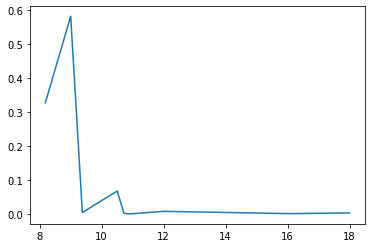

In [71]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

In [140]:
# pdf中的表格
pages = pdf.pages
# i = 1
# for page in pages:
#     i += 1
#     print(i)
#     for table in page.find_tables():
#         print(table.bbox) 

page = pages[-1]
bboxes = []
for table in page.find_tables():
    # print(table.bbox) 
    bboxes.append(table.bbox)
    print(table.extract())
bboxes[0]

[['备查文件目录', '(一)载有公司法定代表人、主管会计负责人、会计机构负责人签名并盖章的财务报表。'], ['备查文件目录', '(二)载有会计师事务所盖章、注册会计师签名并盖章的财务、内控审计报告原件。'], ['备查文件目录', '(三)报告期内在《上海证券报》、上交所网站公开披露过的所有公司文件正本及公告\n的原稿。']]


(Decimal('62.280'), Decimal('167.300'), Decimal('533.260'), Decimal('223.340'))

In [149]:
def is_in_table(x,y,bboxes):
    for box in bboxes:
        if box[0]<x and x<box[2] and box[1]<y and y<box[3]:
            return True
    return False
is_in_table(147.980,179.709,bboxes)

True

In [148]:
for c in page.chars:
    if c["text"] in ["三","告","章"]:
        # print(c["text"],c["x1"],c["y1"])
        print(c)

{'fontname': "b'ABCDEE+\\xcb\\xce\\xcc\\xe5'", 'adv': Decimal('9.000'), 'upright': 1, 'x0': Decimal('321.050'), 'y0': Decimal('788.811'), 'x1': Decimal('330.050'), 'y1': Decimal('797.811'), 'width': Decimal('9.000'), 'height': Decimal('9.000'), 'size': Decimal('9.000'), 'object_type': 'char', 'page_number': 120, 'text': '告', 'top': Decimal('44.109'), 'bottom': Decimal('53.109'), 'doctop': Decimal('98013.189')}
{'fontname': "b'ABCDEE+\\xcb\\xce\\xcc\\xe5'", 'adv': Decimal('10.560'), 'upright': 1, 'x0': Decimal('463.502'), 'y0': Decimal('662.211'), 'x1': Decimal('474.062'), 'y1': Decimal('672.771'), 'width': Decimal('10.560'), 'height': Decimal('10.560'), 'size': Decimal('10.560'), 'object_type': 'char', 'page_number': 120, 'text': '章', 'top': Decimal('169.149'), 'bottom': Decimal('179.709'), 'doctop': Decimal('98138.229')}
{'fontname': "b'ABCDEE+\\xcb\\xce\\xcc\\xe5'", 'adv': Decimal('10.560'), 'upright': 1, 'x0': Decimal('263.559'), 'y0': Decimal('648.171'), 'x1': Decimal('274.119'), '